### Deep Neural Network with Dropout using Keras

In [1]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np

In [3]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

#### Dataset

In [4]:
# Use the MNIST dataset of Keras
mnist = tf.keras.datasets.mnist
(Xtrain, Ytrain) , (Xtest, Ytest) = mnist.load_data()

In [5]:
# Normalize the data

# 60000 images are there in the train set
# 10000 images are there in the test set

Xtrain = Xtrain.reshape((60000, 28 * 28)) # reshape the input set to size 28 * 28
Xtrain = Xtrain.astype("float32") / 255 # Normalize the grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28 * 28))
Xtest = Xtest.astype("float32") / 255

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

#### DNN model

Using Keras, create the DNN or Sequential Model

In [9]:
dnnModel = models.Sequential()

Specifying the number of neurons in each layer and the activation function used in each layer

In [10]:
# Layer 1: input layer
# Specify the input size for in the first layer.
dnnModel.add(layers.Dense(50, activation="relu", input_shape=(28*28, )))

# Layer 2: hidden layer
dnnModel.add(layers.Dense(60, activation="relu"))

# Add dropout of 50% to layer 2
dnnModel.add(layers.Dropout(0.5))

# Layer 3: hidden layer
dnnModel.add(layers.Dense(30, activation="relu"))

# Add dropout of 50% to layer 3
dnnModel.add(layers.Dropout(0.5))

# Layer 4: output layer
dnnModel.add(layers.Dense(10, activation="softmax"))

dnnModel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 60)                  │           3,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,450 (173.63 KB)

 Trainable params: 44,450 (173.63 KB)

 Non-trainable params: 0 (0.00 B)

#### Regularization and Optimizations of DNN

In [11]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# Metrics: List of metrics to be evaluated by the model during training and testing.

dnnModel.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
h = dnnModel.fit(Xtrain, Ytrain, validation_split=0.2, epochs=25, batch_size=64)

Epoch 1/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5129 - loss: 1.3977 - val_accuracy: 0.9263 - val_loss: 0.2766
Epoch 2/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8545 - loss: 0.5175 - val_accuracy: 0.9420 - val_loss: 0.2096
Epoch 3/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8913 - loss: 0.3894 - val_accuracy: 0.9509 - val_loss: 0.1917
Epoch 4/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9116 - loss: 0.3305 - val_accuracy: 0.9570 - val_loss: 0.1780
Epoch 5/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9209 - loss: 0.2961 - val_accuracy: 0.9604 - val_loss: 0.1637
Epoch 6/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9294 - loss: 0.2555 - val_accuracy: 0.9580 - val_loss: 0.1797
Epoch 7/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9348 - loss: 0.2444 - val_accuracy: 0.9614 - val_loss: 0.1662
Epoch 8/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9392 - loss: 0.2207 - val_accuracy: 0.

In [13]:
print("Final training accuracy", h.history["accuracy"][-1])
print("Final validation accuracy", h.history["val_accuracy"][-1])

Final training accuracy 0.9636041522026062
Final validation accuracy 0.9665833115577698


In [18]:
print(f"Testing loss: {h.history['loss'][-1]}")
print(f"Testing accuracy: {h.history['accuracy'][-1]}")

Testing loss: 0.11926475167274475
Testing accuracy: 0.9636041522026062


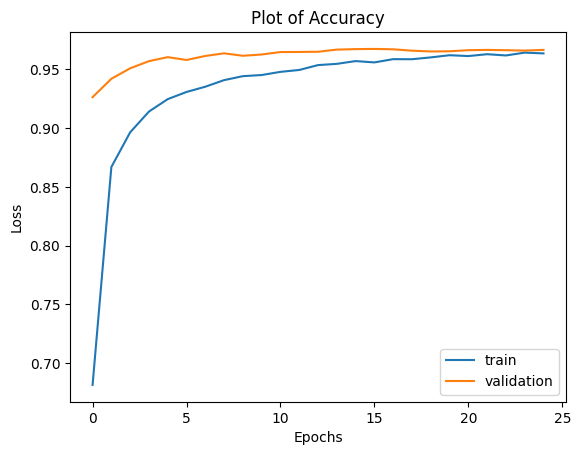

In [22]:
# plot the training  accuracy  
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Accuracy')
plt.legend()
plt.show()

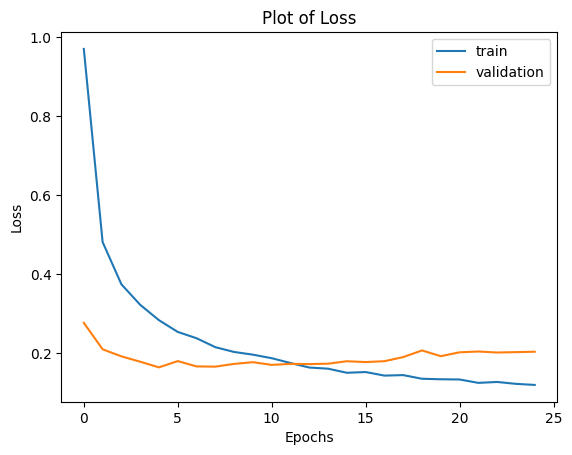

In [23]:
# plot the traininig loss 
plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Loss')
plt.legend()
plt.show()

#### Testing the Model

In [24]:
# testing the model
testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9659 - loss: 0.2115


In [25]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.1929236203432083
Testing accuracy  0.9689000248908997
